# PROJETO: Detecting economic crisis in African countries / Detectando crises econômicas em países africanos
## João Leopoldo e Silva e Fabiano Ferreira
https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data

## Resumo

Neste projeto tentamos, em primeiro lugar, separar os países por independência a fim de analisar as economias nestes diferentes contextos. Entretanto percebemos que não haveriam dados suficientes sobre crise. Procuramos, então, fazer outra separação, agora em dois momentos históricos: 1994-2004 e 2004-2014. Tivemos o mesmo problema. Decidimos, por fim, o usar o dataset completo e criar um modelo que conseguisse encontrar quando e aonde houve crise.

#### importanto bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from yellowbrick.classifier import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,confusion_matrix

#### acessando dataset

In [3]:
data = pd.read_csv('african_crises.csv')
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


#### verificando valores nulos

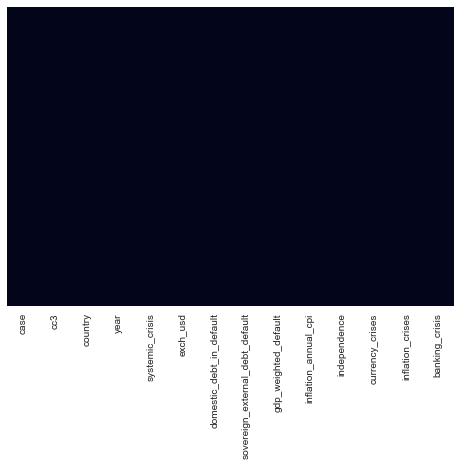

In [4]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False);

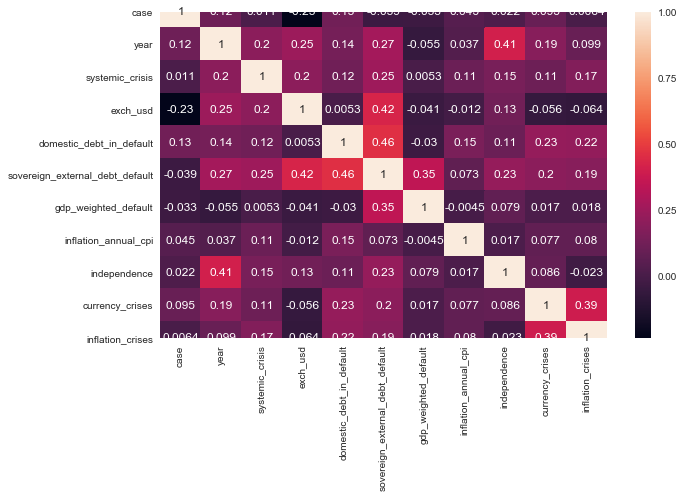

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True);

## tentativa 1) 1994-2004 e 2004-2014
### 1994-2004

In [6]:
data_94_04 = data.query('year >= 1994 and year < 2005')
data_94_04

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
64,1,DZA,Algeria,1994,0,4.289250e+01,0,1,0.23,29.000000,1,1,1,no_crisis
65,1,DZA,Algeria,1995,0,5.217500e+01,0,1,0.23,29.800000,1,1,1,no_crisis
66,1,DZA,Algeria,1996,0,5.618590e+01,0,1,0.23,18.700000,1,0,0,no_crisis
67,1,DZA,Algeria,1997,0,5.841390e+01,0,0,0.00,5.700000,1,0,0,no_crisis
68,1,DZA,Algeria,1998,0,6.035310e+01,0,0,0.00,4.950000,1,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,70,ZWE,Zimbabwe,2000,1,5.500000e-25,1,1,0.00,55.203696,1,1,1,crisis
1046,70,ZWE,Zimbabwe,2001,1,5.510000e-25,1,1,0.00,112.118411,1,0,1,crisis
1047,70,ZWE,Zimbabwe,2002,1,5.500000e-25,1,1,0.00,198.928606,1,0,1,crisis
1048,70,ZWE,Zimbabwe,2003,1,7.950000e-24,1,1,0.00,598.744751,1,1,1,crisis


In [7]:
data_94_04[['country','inflation_crises']].groupby('country').mean()

,inflation_crises
country,
Algeria,0.181818
Angola,1.000000
Central African Republic,0.090909
Egypt,0.000000
Ivory Coast,0.090909
Kenya,0.090909
Mauritius,0.000000
Morocco,0.000000
Nigeria,0.363636


In [8]:
data_94_04_anos = data_94_04[['year', 'country']].groupby('country').count()

In [9]:
data_94_04_s_c = data_94_04[['systemic_crisis', 'country']].groupby('country').sum()

In [10]:
data_94_04_anos_s_c = pd.concat([data_94_04_anos, data_94_04_s_c], axis=1).reset_index()
data_94_04_anos_s_c

,country,year,systemic_crisis
0,Algeria,11,0
1,Angola,11,0
2,Central African Republic,11,6
3,Egypt,11,0
4,Ivory Coast,11,0
5,Kenya,11,6
6,Mauritius,11,0
7,Morocco,11,0
8,Nigeria,11,2
9,South Africa,11,0


### 2004-2014

In [11]:
data_04_14 = data.query('year > 2004')

In [12]:
data_04_14['systemic_crisis'].value_counts(normalize=True)

0    0.914062
1    0.085938
Name: systemic_crisis, dtype: float64

In [13]:
data_04_14_anos = data_04_14[['year', 'country']].groupby('country').count()#.get_group('Angola').count()

In [14]:
data_04_14_s_c = data_04_14[['systemic_crisis', 'country']].groupby('country').sum()

In [15]:
data_04_14_anos_s_c = pd.concat([data_04_14_anos, data_04_14_s_c], axis=1).reset_index()
data_04_14_anos_s_c

,country,year,systemic_crisis
0,Algeria,10,0
1,Angola,10,0
2,Central African Republic,10,0
3,Egypt,10,0
4,Ivory Coast,10,0
5,Kenya,10,0
6,Mauritius,10,0
7,Morocco,10,0
8,Nigeria,10,6
9,South Africa,9,0


***

## tentativa 2) criação de modelo para prever crises

### problema de pesquisa:
- queremos criar um modelo que consiga indicar quais países poderão entrar em crise (na realidade vendo quais entraram pois estamos trabalhando com dados históricos), ancorado nas informações presentes no dataset

In [16]:
data.banking_crisis.value_counts()

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

In [17]:
data.systemic_crisis.value_counts()

0    977
1     82
Name: systemic_crisis, dtype: int64

In [18]:
data.loc[data['banking_crisis'] == 'crisis']['systemic_crisis'].value_counts()

1    76
0    18
Name: systemic_crisis, dtype: int64

In [19]:
data.loc[data['systemic_crisis'] == 1]['country'].value_counts()

Central African Republic    19
Zimbabwe                    15
Kenya                       13
Nigeria                     10
Egypt                        6
Tunisia                      5
Algeria                      4
Ivory Coast                  4
Zambia                       4
Morocco                      2
Name: country, dtype: int64

### criando dummies para a coluna banking_crisis

In [20]:
data = pd.get_dummies(data, columns=['banking_crisis'])
data

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_crisis,banking_crisis_no_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,1,0
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,0,1
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,0,1
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,0,1


In [21]:
data = data.drop(columns=['banking_crisis_no_crisis'])

In [22]:
X = data[['country','year','exch_usd','domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises']]

y = data.systemic_crisis

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

                                                                            # usamos o stratify para sempre ter,
                                                                            # na hora de rodar o modelo, info sobre
                                                                            # crises

### regressão logística

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.drop(columns=['country']), y_train)

C:\Users\JOAO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = logistic_regression.predict(X_test.drop(columns=['country']))

In [27]:
visualizer = confusion_matrix(y_test, y_pred)
visualizer

array([[196,   0],
       [ 16,   0]], dtype=int64)

In [28]:
logistic_regression.coef_

array([[-1.40853487e-03,  3.82138730e-03,  1.19623015e-05,
         3.36920189e-05, -2.78903240e-07,  7.82990362e-04,
         3.10129901e-05,  2.16610731e-05,  3.15313671e-05]])

C:\Users\JOAO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


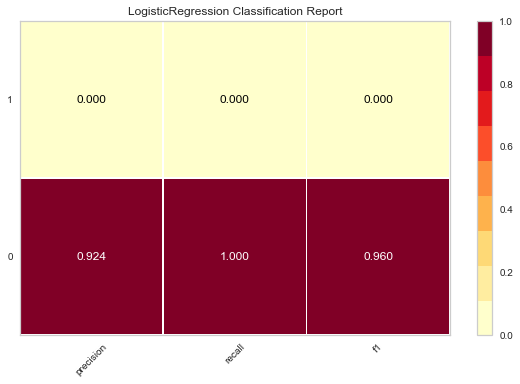

In [29]:
visualizer = classification_report(logistic_regression, X_test.drop(columns=['country']), y_test, test_size=0.99)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

accuracy_score(y_test, y_pred)

0.9245283018867925

In [31]:
#y_pred

In [32]:
#logistic_regression.predict_proba(X_test)

In [33]:
#logistic_regression.predict_proba(X_test)[:, 1]

In [34]:
#y_test

In [35]:
#logistic_regression.coef_

### ampliando threshold (do padrão 0.5 para 0.2)
buscamos diminuir o threshold para aumentar a qtd de crises capturadas pelo modelo

In [36]:
# probabilidade de ser crise (1)
#logistic_regression.predict_proba(X_test)[:, 1]

In [37]:
#logistic_regression.predict_proba(X_test)[:, 1] > 0.5

In [38]:
from sklearn.preprocessing import binarize
y_pred_new = binarize(logistic_regression.predict_proba(X_test.drop(columns=['country'])), threshold=0.2)[:,1]

In [39]:
accuracy_score(y_test, y_pred_new)

0.9056603773584906

In [40]:
roc_auc_score(y_test, logistic_regression.predict_proba(X_test.drop(columns=['country']))[:, 1])

0.7085459183673469

In [41]:
confusion_matrix(y_test, y_pred_new)

array([[190,   6],
       [ 14,   2]], dtype=int64)

C:\Users\JOAO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


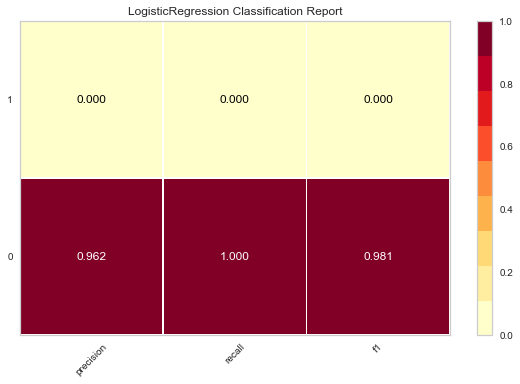

In [42]:
visualizer = classification_report(logistic_regression, X_test.drop(columns=['country']), y_pred_new, test_size=0.99)

### passando roc na regressão logística
curva 0.5 é aleatória

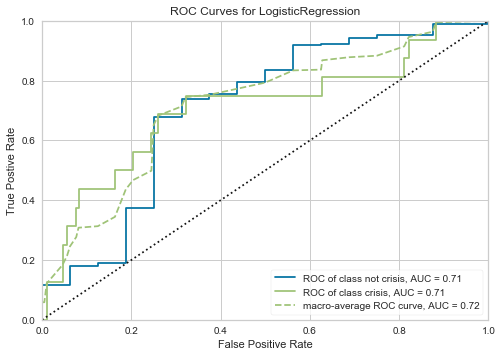

In [43]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logistic_regression, classes=["not crisis", "crisis"], micro=False)

visualizer.fit(X_train.drop(columns=['country']), y_train)
visualizer.score(X_test.drop(columns=['country']), y_test)
visualizer.show();

### implementando novo modelo (lightgbm) e passando roc

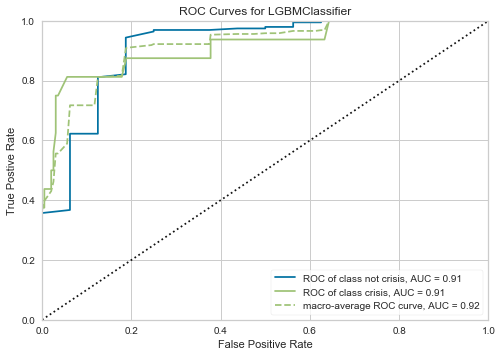

In [44]:
import lightgbm

lgb = lightgbm.LGBMClassifier(n_estimators=30, max_depth=2, colsample_bytree=0.7)
lgb.fit(X_train.drop(columns=['country']), y_train)


visualizer = ROCAUC(lgb, classes=["not crisis", "crisis"], micro=False)

visualizer.fit(X_train.drop(columns=['country']), y_train)
visualizer.score(X_test.drop(columns=['country']), y_test)
visualizer.show();

### comparando os scores entre roc teste e roc train

In [45]:
#roc teste

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, lgb.predict_proba(X_train.drop(columns=['country']))[:, 1])

0.9422748612889458

In [46]:
#roc treino

roc_auc_score(y_test, lgb.predict_proba(X_test.drop(columns=['country']))[:, 1])

0.9134247448979592

### vendo novos resultados

In [47]:
from sklearn.preprocessing import binarize
y_pred_new = binarize(lgb.predict_proba(X_test.drop(columns=['country'])), threshold=0.2)[:,1]

In [48]:
visualizer = confusion_matrix(y_test, y_pred_new)
visualizer

array([[190,   6],
       [  6,  10]], dtype=int64)

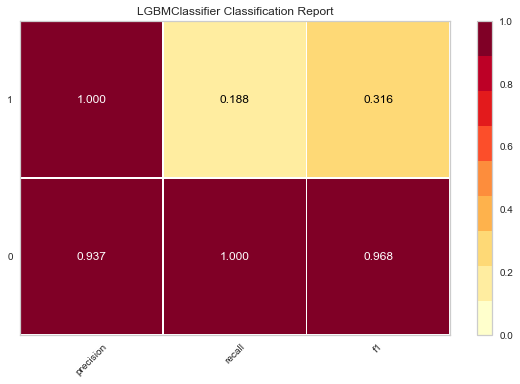

In [49]:
visualizer = classification_report(lgb, X_test.drop(columns=['country']), y_pred_new, test_size=0.99)

### variáveis e respectivos pesos que mais influenciaram o modelo:

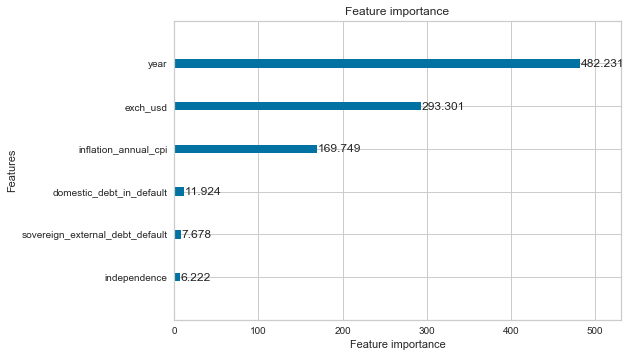

In [50]:
lightgbm.plot_importance(lgb, importance_type='gain');

In [51]:
lgb_pred = pd.DataFrame(lgb.predict_proba(X_test.drop(columns=['country'])))

In [52]:
X_test.reset_index(drop=True).head()

,country,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,Algeria,1998,60.3531,0,0,0.0,4.950000,1,0,0
1,Tunisia,1942,129.8310,0,0,0.0,24.996313,0,0,1
2,South Africa,1936,0.2008,0,0,0.0,0.906667,1,0,0
3,Tunisia,2009,1.3173,0,0,0.0,3.530000,1,0,0
4,Egypt,1972,0.4348,0,0,0.0,2.424103,1,0,0


In [53]:
lgb_pred.head()

,0,1
0,0.839692,0.160308
1,0.974721,0.025279
2,0.986700,0.013300
3,0.933981,0.066019
4,0.989868,0.010132


In [54]:
data_final = pd.concat([X_test.reset_index(drop=True), lgb_pred, y_test.reset_index(drop=True)], axis=1)
data_final = data_final.sort_values(1, ascending=False).head(10)

In [55]:
data_final

,country,year,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,0,1,systemic_crisis
86,Central African Republic,1988,3.029498e+02,0,1,0.00,-3.934,1,0,0,0.461686,0.538314,1
52,Ivory Coast,1990,2.670000e+02,0,1,0.00,-0.658,1,0,0,0.461686,0.538314,1
66,Central African Republic,1990,2.564498e+02,0,1,0.00,-0.203,1,0,0,0.461686,0.538314,1
140,Nigeria,1993,2.188184e+01,0,1,0.00,57.143,1,0,1,0.653839,0.346161,1
142,Algeria,1991,2.139190e+01,0,1,0.23,25.900,1,1,1,0.653839,0.346161,1
41,Central African Republic,1995,4.899997e+02,0,1,0.00,19.200,1,0,0,0.665957,0.334043,1
15,Angola,1995,5.692000e-03,1,1,0.00,2672.230,1,2,1,0.677298,0.322702,0
188,Central African Republic,1982,3.362498e+02,0,0,0.00,13.243,1,0,0,0.710026,0.289974,1
23,Angola,1991,1.800000e-07,0,1,0.00,85.265,1,1,1,0.718328,0.281672,0
174,Central African Republic,2007,4.455927e+02,0,1,0.00,0.935,1,0,0,0.728351,0.271649,0


## predição final (resultado)

In [56]:
data_final = data_final[['country','year',0,1,'systemic_crisis']]
data_final

,country,year,0,1,systemic_crisis
86,Central African Republic,1988,0.461686,0.538314,1
52,Ivory Coast,1990,0.461686,0.538314,1
66,Central African Republic,1990,0.461686,0.538314,1
140,Nigeria,1993,0.653839,0.346161,1
142,Algeria,1991,0.653839,0.346161,1
41,Central African Republic,1995,0.665957,0.334043,1
15,Angola,1995,0.677298,0.322702,0
188,Central African Republic,1982,0.710026,0.289974,1
23,Angola,1991,0.718328,0.281672,0
174,Central African Republic,2007,0.728351,0.271649,0
